In [54]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt 
import seaborn as sns
import plotnine as gg
from plotnine import ggplot


vp1 = pd.read_csv('vp1.csv')
vp1["participant"] = "vp1"
vp1.to_csv("vp1.csv", index=False)

vp2 = pd.read_csv('vp2.csv')
vp2["participant"] = "vp2"
vp2.to_csv("vp2.csv", index=False)

info = pd.read_csv('ldinfo.csv')

participants = pd.concat([vp1,vp2])
participants


all_data = pd.merge(participants,info, on='stim_id')
all_data

,stim_id,start_time,end_time,key,reaction_time,participant,condition,freq_category,word,subtlex_log10freq
0,0,0.074767,1.707187,m,1.632420,vp1,rw,LF,buidels,0.301
1,0,0.048573,1.296306,m,1.247733,vp2,rw,LF,buidels,0.301
2,1,1.741706,2.493649,m,0.751943,vp1,rw,LF,hese,0.301
3,1,1.331677,1.761309,m,0.429631,vp2,rw,LF,hese,0.301
4,2,2.524900,3.372663,m,0.847763,vp1,rw,LF,imams,0.301
...,...,...,...,...,...,...,...,...,...,...
395,197,143.041343,143.622673,x,0.581331,vp2,nw,none,snarpen,0
396,198,180.086869,180.762607,x,0.675737,vp1,nw,none,spodiel,0
397,198,143.658188,144.464396,x,0.806208,vp2,nw,none,spodiel,0
398,199,180.803675,181.780661,x,0.976986,vp1,nw,none,fankel,0


In [61]:

participant = all_data.groupby(by='participant').aggregate(
    mean_RT=pd.NamedAgg('reaction_time', np.mean),
    std_RT=pd.NamedAgg('reaction_time', np.std)
)
participant.reset_index(inplace=True)
participant



,participant,mean_RT,std_RT
0,vp1,0.876954,0.298497
1,vp2,0.695617,0.289863


In [33]:
### Visualisation

from matplotlib import pyplot as plt 
import seaborn as sns
import plotnine as gg
from plotnine import ggplot




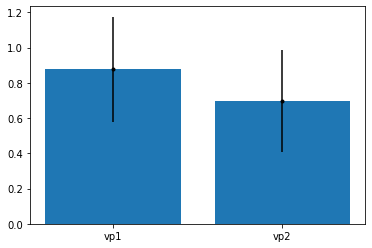

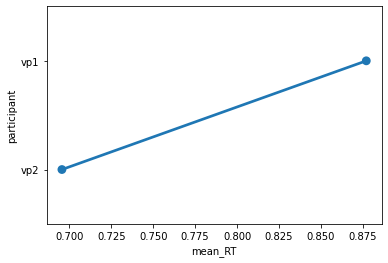

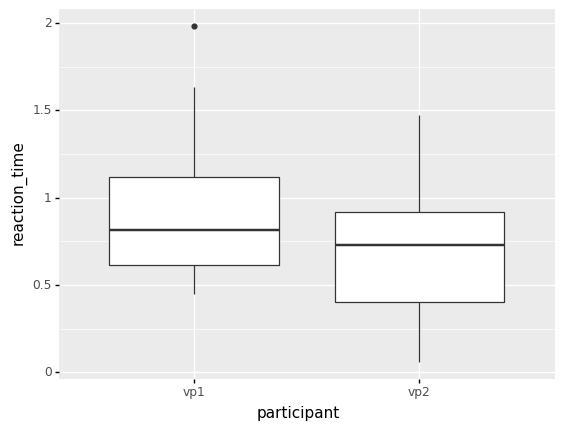

In [68]:
plt.figure()
plt.bar(participant['participant'], participant['mean_RT'])
plt.errorbar(participant['participant'], participant['mean_RT'], participant['std_RT'], fmt='k.')
plt.show()


sns.pointplot(x='mean_RT', y='participant', data=participant)
plt.show()


plot = (
    ggplot(gg.aes(x='participant', y='reaction_time'), data=all_data) + 
    gg.geom_boxplot()
)
plot.draw()
plt.show()

In [63]:
condition = all_data.groupby(by='condition').aggregate(
    mean_RT=pd.NamedAgg('reaction_time', np.mean),
    std_RT=pd.NamedAgg('reaction_time', np.std),

)
condition.reset_index(inplace=True)
condition

,condition,mean_RT,std_RT
0,nw,1.012509,0.218625
1,rw,0.560061,0.197432


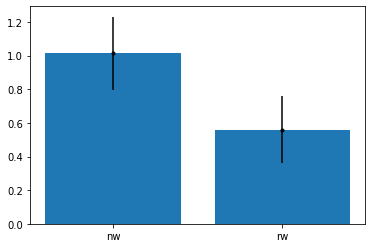

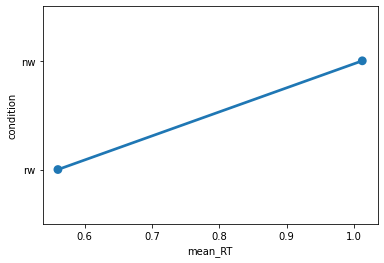

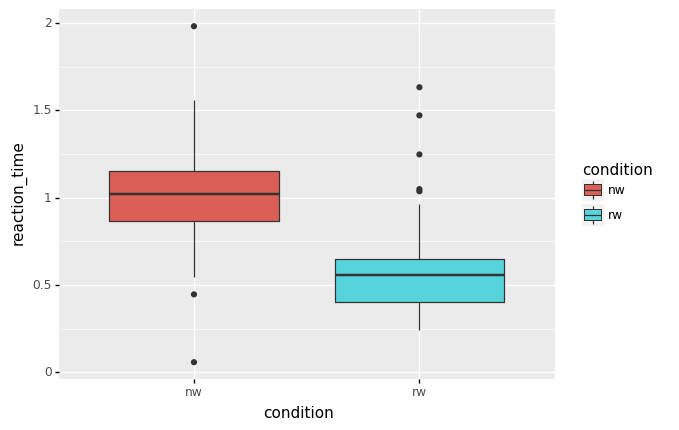

In [70]:
plt.figure()
plt.bar(condition['condition'], condition['mean_RT'])
plt.errorbar(condition['condition'], condition['mean_RT'], condition['std_RT'], fmt='k.')
plt.show()


sns.pointplot(x='mean_RT', y='condition', data=condition)
plt.show()


plot = (
    ggplot(gg.aes(x='condition', y='reaction_time'), data=all_data) + 
    gg.geom_boxplot(gg.aes(fill='condition'))
)
plot.draw()
plt.show()

In [71]:
frequencies = all_data.groupby(by='freq_category').aggregate(
    mean_RT=pd.NamedAgg('reaction_time', np.mean),
    std_RT=pd.NamedAgg('reaction_time', np.std),

)
frequencies.reset_index(inplace=True)
frequencies

,freq_category,mean_RT,std_RT
0,HF,0.518330,0.175643
1,LF,0.601793,0.209722
2,none,1.012509,0.218625


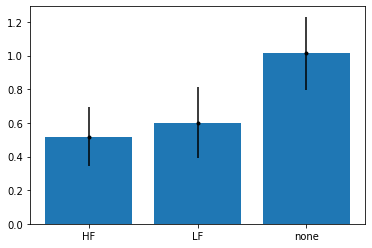

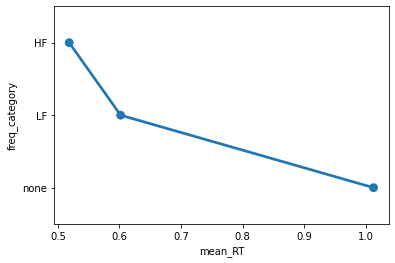

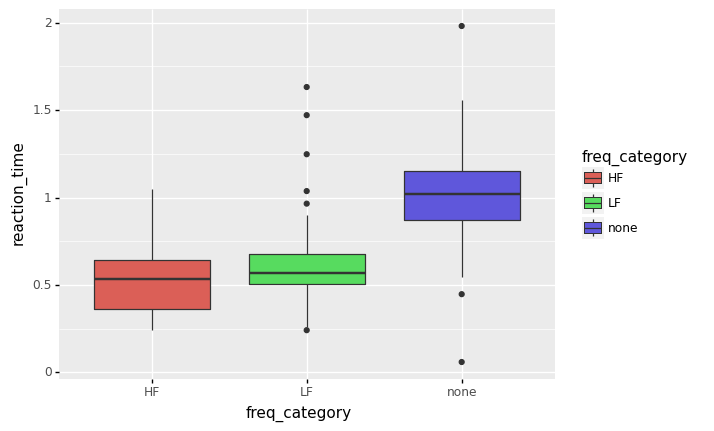

In [72]:
plt.figure()
plt.bar(frequencies['freq_category'], frequencies['mean_RT'])
plt.errorbar(frequencies['freq_category'], frequencies['mean_RT'], frequencies['std_RT'], fmt='k.')
plt.show()


sns.pointplot(x='mean_RT', y='freq_category', data=frequencies)
plt.show()


plot = (
    ggplot(gg.aes(x='freq_category', y='reaction_time'), data=all_data) + 
    gg.geom_boxplot(gg.aes(fill='freq_category'))
)
plot.draw()
plt.show()